# Homework 3
**Author: Chinmay Upadhye**


## Problem 2: Default dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\chinm\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
df= pd.read_csv("Default.csv");
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)


,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002010B084668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002010B2EB4E0>]], dtype=object)

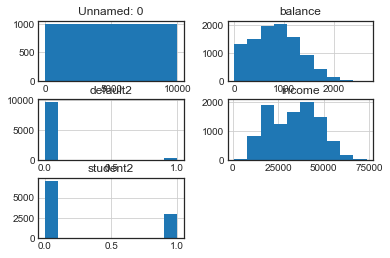

In [6]:
df.hist()

In [67]:
df.describe()

,Unnamed: 0,balance,income,default2,student2
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876,0.033300,0.294400
std,2886.89568,483.714985,13336.639563,0.179428,0.455795
min,1.00000,0.000000,771.967729,0.000000,0.000000
25%,2500.75000,481.731105,21340.462903,0.000000,0.000000
50%,5000.50000,823.636973,34552.644802,0.000000,0.000000
75%,7500.25000,1166.308386,43807.729272,0.000000,1.000000
max,10000.00000,2654.322576,73554.233495,1.000000,1.000000


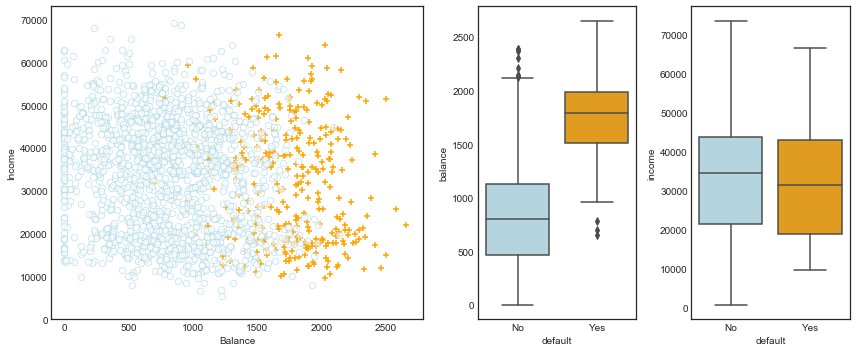

In [68]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])


# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

## Scatterplot of balance and income

Logistic Regression Table 4.1,4.2 & 4.3


In [69]:

clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df.balance.values.reshape(-1,1)
y = df.default2

clf= clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
classes:  [0 1]
coefficients:  [[ 0.00549891]]
intercept : [-10.6513229]


In [70]:
X_train = sm.add_constant(df.balance)
est = smf.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.651331,0.361169,-29.491287,3.723665e-191,-11.359208,-9.943453
balance,0.005499,0.000220,24.952404,2.010855e-137,0.005067,0.005931


In [71]:
X_train = sm.add_constant(df.student2)
y = df.default2

est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320


In [72]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


## LDA with TP, TN, FP, FN precision and recall

In [73]:
X = df[['balance', 'income', 'student2']].as_matrix()
y = df.default2.as_matrix()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [74]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))

             precision    recall  f1-score   support

         No       0.97      1.00      0.99      9667
        Yes       0.78      0.24      0.36       333

avg / total       0.97      0.97      0.97     10000



In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\chinm\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
auto= pd.read_csv("Auto_cleaned.csv")
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Problem 4

Chapter 3 read.

### MNIST Dataset
Modified National Institute of Standards and Technology database acronym MNIST dataset is a largest dataset which contains the handwritten digits by American students. Th database contains 70000 small images of digits with each image having 784 features. This is due to the fact that each image is 28x28 pixels. The intensity of the pixels is set up to be in between 0 to 255.
For trining nueral networks, we split the given database into training and test dataset with indexing values shuffled. Training dataset contains 60000 images, with special databse-3 (SD-3) format. While test database is stored in SD-1 format.
The lowest error rate achieved on MNIST is 0.23 done by using Convolutional Neural Network (CNN).

## KNN binary classifier. 

In [1]:
## Two classes (5 and not 5) hence we are using two neighbours in KNN. The predictions are mapped for class equal to 5.
import numpy as np
from numpy import arange
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import time


mnist = fetch_mldata("MNIST Original")

n_train = 60000
n_test = 10000
train_idx = arange(0,n_train)
test_idx = arange(n_train+1,n_train+n_test)




In [2]:
X_train, y_train = mnist.data[train_idx], mnist.target[train_idx]
X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]

y_train_5 = (y_train==5)
y_test_5= (y_test==5)
 

print ("Reducing dimensions using PCA with 196 components")
start_time = time.time()
pca = PCA(n_components = 196)
pca.fit(X_train)
print ("Transforming training")
X_train_pca = pca.transform(X_train)
print ("Transforming testing")
X_test_pca = pca.transform(X_test)
end_time = time.time()
print ("Running time for PCA:", end_time - start_time)
print (X_train_pca.shape)
print (X_test_pca.shape)

for n in range(2,3):
  print ("Applying KNN algorithm with neighbours:", n)
  start_time = time.time()
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(X_train_pca, y_train_5)
  print ("Making predictions...")
  y_pred_5 = clf.predict(X_test_pca)
# Creating confusion matrix
  conf_matrix = confusion_matrix(y_test_5, y_pred_5)
  print (conf_matrix)
    # Evaluate the prediction


Reducing dimensions using PCA with 196 components
Transforming training
Transforming testing
Running time for PCA: 6.303286790847778
(60000, 196)
(9999, 196)
Applying KNN algorithm with neighbours: 2
Making predictions...
[[9095   12]
 [  60  832]]


In [3]:
print ("Evaluating results...")
print ("Precision: \t", metrics.precision_score(y_test_5, y_pred_5,average='micro'))

Evaluating results...
Precision: 	 0.992799279928


In [4]:
  end_time = time.time()
  print ("Running time for KNN:", end_time - start_time)

Running time for KNN: 179.06268978118896


## Logistic regression.

In [7]:
## We are selecting liblinear because we have only two classes 5 and not 5

LogReg = skl_lm.LogisticRegression(solver='liblinear',multi_class='ovr')
#X_train = np.arrange(mnist.)
LogReg= LogReg.fit(X_train,y_train_5)
print(LogReg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [8]:
pred = LogReg.predict(X_test)
cm_mnist = pd.DataFrame(confusion_matrix(y_test_5, pred).T, index=LogReg.classes_,
                     columns=LogReg.classes_)
cm_mnist.index.name = 'Predicted'
cm_mnist.columns.name = 'True'
print(cm_mnist)
print(classification_report(y_test_5, pred))

True       False  True 
Predicted              
False       9024    145
True          83    747
             precision    recall  f1-score   support

      False       0.98      0.99      0.99      9107
       True       0.90      0.84      0.87       892

avg / total       0.98      0.98      0.98      9999



In [9]:
conf_matrix = confusion_matrix(y_test_5,pred)
print (conf_matrix)

[[9024   83]
 [ 145  747]]


## Linear Discriminant Analysis (LDA) 

In [10]:


LDAReg = LinearDiscriminantAnalysis (solver='lsqr', shrinkage=None, priors=None, n_components=2)
LDAReg = LDAReg.fit(X_train,y_train_5)
print(LDAReg)

predL = LDAReg.predict(X_test)
cm_mnist_L = pd.DataFrame(confusion_matrix(y_test_5, pred).T, index=LDAReg.classes_,
                     columns=LDAReg.classes_)
cm_mnist_L.index.name = 'Predicted'
cm_mnist_L.columns.name = 'True'
print(cm_mnist_L)
print(classification_report(y_test_5, predL))

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='lsqr', store_covariance=False, tol=0.0001)
True       False  True 
Predicted              
False       9024    145
True          83    747
             precision    recall  f1-score   support

      False       0.97      0.99      0.98      9107
       True       0.82      0.66      0.73       892

avg / total       0.95      0.96      0.95      9999



In [11]:
conf_matrix_L = confusion_matrix(y_test_5,predL)
print (conf_matrix_L)

[[8982  125]
 [ 305  587]]


## Quadratic Discriminant Analysis

In [12]:

QDAReg = QuadraticDiscriminantAnalysis (priors= None)
QDAReg = QDAReg.fit(X_train,y_train_5)
print(QDAReg)

predQ = QDAReg.predict(X_test)
cm_mnist_Q = pd.DataFrame(confusion_matrix(y_test_5, predQ).T, index=QDAReg.classes_,
                     columns=QDAReg.classes_)
cm_mnist_Q.index.name = 'Predicted'
cm_mnist_Q.columns.name = 'True'
print(cm_mnist_Q)
print(classification_report(y_test_5, predQ))



C:\Users\chinm\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)
True       False  True 
Predicted              
False       1301     11
True        7806    881
             precision    recall  f1-score   support

      False       0.99      0.14      0.25      9107
       True       0.10      0.99      0.18       892

avg / total       0.91      0.22      0.24      9999



In [13]:
conf_matrix_Q = confusion_matrix(y_test_5,predQ)
print (cm_mnist_Q)

True       False  True 
Predicted              
False       1301     11
True        7806    881


### Observation from parameters
KNN has precision around 0.99 percent, after that Logistic performs better. LDA has 0.95 while QDA has 0.91 precision. In terms of recall logistics and LDA has around 0.96 while QDA has only 0.22. This happens due to the fact that QDA has high number of false positives. This is evident from confusion matrix showing FP values around 7806. So we can say for binary classification LDA should be our ideal choice. Even though KNN has good performance it is way too complex model for such classification. Logistic model is more effective when we have multiple independant variables. It can achieve more complex fit than LDA.